In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("df.csv")

In [39]:
all_match = ['France - Autriche', 'Portugal - Tchéquie','Suisse - Ecosse', 'Espagne - Italie','Pays-Bas - France']

In [40]:
def compute_winner(x):
    if(len(x)<4):
        if((int(x[0]) - int(x[2])) > 0):
            return "Domicile"
        elif((int(x[0]) - int(x[2])) == 0):
            return "Nul"
        else:
            return "Exterieur"
    else:
        return "Pas joué"

In [41]:
for match in all_match:
    r = match + " winner"
    df[r] = df[match].apply(lambda x : compute_winner(x))

# Compute score

In [42]:
for match in all_match:
    b = match + " score_final"
    df[b] = "Pas joué"

In [43]:
df["France - Autriche score_final"] = "1-0"
df["Portugal - Tchéquie score_final"] = "2-1"
df['Suisse - Ecosse score_final'] = "1-1"
df['Espagne - Italie score_final'] = "1-0"
df["Pays-Bas - France score_final"] = "0-0"

In [44]:
for match in all_match:
    s = match + " points"
    a = match + " real winner"
    int_ = match + " basic"
    score = match + " score_final"
    df[a] = df[score].apply(lambda x : compute_winner(x))
    df[s] = np.where(df[match +" score_final"] == df[match], 3, 0)
    df[int_] = np.where(df[match+" winner"] == df[a], 1, 0)
    df[int_] = df.apply(lambda row: 0 if row[s] == 3 else row[int_], axis=1)
    df[s] = df[s]+df[int_]
    df.drop(int_ , axis = 1, inplace = True)

In [45]:
score_columns = [col for col in df.columns if col.endswith('points')]
df['total_score'] = df[score_columns].sum(axis=1)

# Affichage

In [46]:
affichage = ['Participants', 'France - Autriche', 'Portugal - Tchéquie',
       'Suisse - Ecosse', 'Espagne - Italie',"Pays-Bas - France",'France - Autriche points','Portugal - Tchéquie points','Suisse - Ecosse points',
            'Espagne - Italie points',"Pays-Bas - France points", "total_score"]
df[affichage]

,Participants,France - Autriche,Portugal - Tchéquie,Suisse - Ecosse,Espagne - Italie,Pays-Bas - France,France - Autriche points,Portugal - Tchéquie points,Suisse - Ecosse points,Espagne - Italie points,Pays-Bas - France points,total_score
0,Guy,1-0,2-1,1-0,1-1,0-4,3,3,0,0,0,6
1,Guy,2-1,1-0,2-1,2-2,1-3,1,1,0,0,0,2
2,Guy,1-1,0-1,1-1,1-0,1-4,0,0,3,3,0,6
3,Lisa,2-1,3-0,2-1,0-1,1-1,1,1,0,0,1,3
4,Lisa,5-1,2-0,2-2,1-0,0-1,1,1,1,3,0,6
5,Lisa,1-0,2-1,1-1,0-2,1-2,3,3,3,0,0,9
6,Gilles,1-0,1-1,2-2,2-2,0-1,3,0,1,0,0,4
7,Gilles,2-0,2-1,2-0,2-1,0-1,1,3,0,1,0,5
8,Gilles,2-1,3-1,2-1,1-2,0-1,1,1,0,0,0,2
9,Coco,3-1,2-0,2-0,1-1,1-2,1,1,0,0,0,2


In [47]:
test = pd.DataFrame(df.groupby(["Participants"])["total_score"].max().sort_values(ascending=False))

In [48]:
test

,total_score
Participants,
Lisa,9
Albert,7
Coco,7
Irwin,7
Pascal,7
Guy,6
Gilles,5
Cyril,4
Jean-Pierre,4


In [49]:
df[affichage].sort_values("total_score", ascending = False)

,Participants,France - Autriche,Portugal - Tchéquie,Suisse - Ecosse,Espagne - Italie,Pays-Bas - France,France - Autriche points,Portugal - Tchéquie points,Suisse - Ecosse points,Espagne - Italie points,Pays-Bas - France points,total_score
5,Lisa,1-0,2-1,1-1,0-2,1-2,3,3,3,0,0,9
35,Pascal,2-0,1-1,1-1,1-0,0-2,1,0,3,3,0,7
10,Coco,1-0,2-1,2-1,2-1,1-3,3,3,0,1,0,7
24,Albert,1-0,2-0,3-0,1-0,1-2,3,1,0,3,0,7
15,Irwin,1-0,2-0,1-0,1-0,1-2,3,1,0,3,0,7
33,Pascal,3-0,2-0,1-0,2-1,0-0,1,1,0,1,3,6
17,Irwin,2-1,3-0,1-1,1-2,1-1,1,1,3,0,1,6
0,Guy,1-0,2-1,1-0,1-1,0-4,3,3,0,0,0,6
2,Guy,1-1,0-1,1-1,1-0,1-4,0,0,3,3,0,6
4,Lisa,5-1,2-0,2-2,1-0,0-1,1,1,1,3,0,6


In [50]:
affiche_2 = ['Participants', 'France - Autriche', 'Portugal - Tchéquie', 'Suisse - Ecosse', 'Espagne - Italie',"Pays-Bas - France", "total_score"]
affichage_2 = df[affiche_2].sort_values("total_score", ascending=False)

In [51]:
affichage_2

,Participants,France - Autriche,Portugal - Tchéquie,Suisse - Ecosse,Espagne - Italie,Pays-Bas - France,total_score
5,Lisa,1-0,2-1,1-1,0-2,1-2,9
35,Pascal,2-0,1-1,1-1,1-0,0-2,7
10,Coco,1-0,2-1,2-1,2-1,1-3,7
24,Albert,1-0,2-0,3-0,1-0,1-2,7
15,Irwin,1-0,2-0,1-0,1-0,1-2,7
33,Pascal,3-0,2-0,1-0,2-1,0-0,6
17,Irwin,2-1,3-0,1-1,1-2,1-1,6
0,Guy,1-0,2-1,1-0,1-1,0-4,6
2,Guy,1-1,0-1,1-1,1-0,1-4,6
4,Lisa,5-1,2-0,2-2,1-0,0-1,6


# Score en direct

In [52]:
test.reset_index(inplace = True)

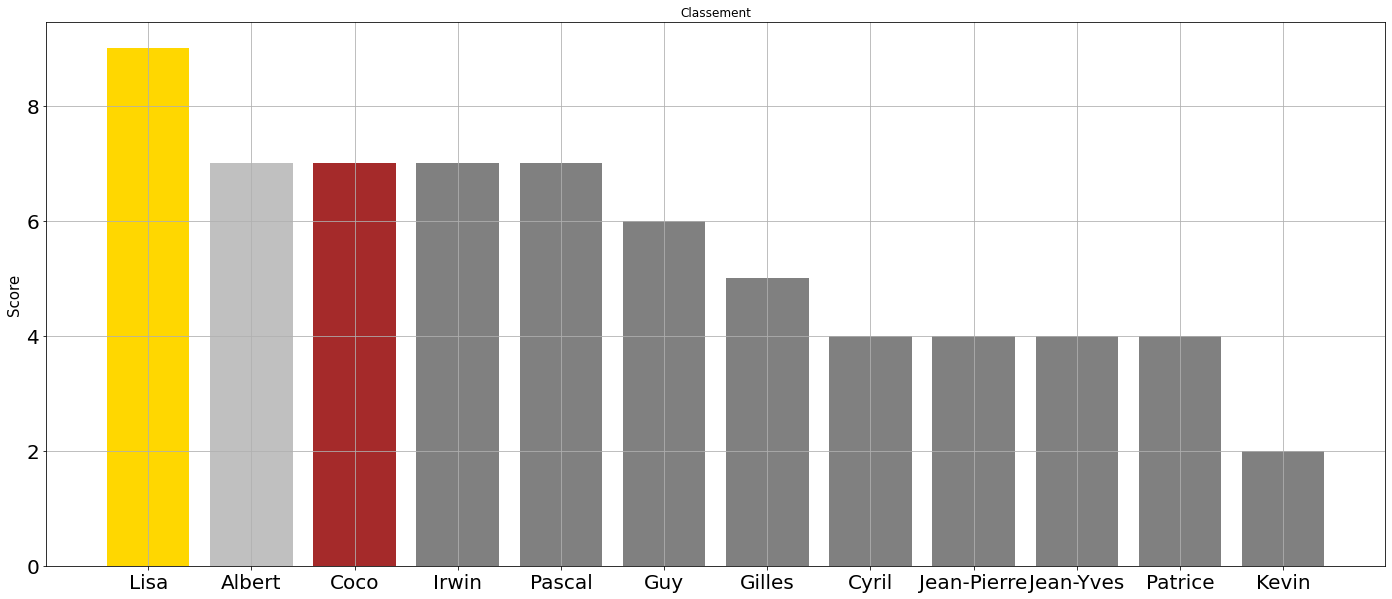

In [53]:
plt.figure(figsize=(24, 10))
plt.bar(test["Participants"],test["total_score"], color=['gold', 'silver', 'brown', "grey","grey","grey","grey","grey","grey","grey","grey","grey"])

plt.ylabel('Score',fontsize=15)
plt.title('Classement')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(True)
plt.savefig('classement.png')
plt.show()

plt.close()

# Live

In [54]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC 
import time
import subprocess
from IPython.display import clear_output
from selenium.webdriver.chrome.options import Options
while True:
    # Your code here
    print("This cell will re-run every 4 minutes")
    clear_output(wait=True)
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run Chrome in headless mode
    chrome_options.add_argument("--disable-gpu")  # Disable GPU acceleration
    chrome_options.add_argument("--no-sandbox")  # Bypass OS security model
    chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems

    driver = webdriver.Chrome(options=chrome_options)
    driver.get("https://www.livescore.in/fr/match/lC7o20K2/#/resume-du-match")
    try:
        container = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID,"detail"))
        )
        domicile = container.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(1)")
        print(domicile.text)
        exterieur = container.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(3)")
        print(exterieur.text)
        df['Pays-Bas - France score_final'] = str(domicile.text) + "-" + str(exterieur.text)
        s = "Pays-Bas - France points"
        a = "Pays-Bas - France real winner"
        int_ = "Pays-Bas - France basic"
        score = "Pays-Bas - France score_final"
        df[a] = df[score].apply(lambda x : compute_winner(x))
        df[s] = np.where(df["Pays-Bas - France score_final"] == df['Pays-Bas - France'], 3, 0)
        df[int_] = np.where(df["Pays-Bas - France winner"] == df[a], 1, 0)
        df[int_] = df.apply(lambda row: 0 if row[s] == 3 else row[int_], axis=1)
        df[s] = df[s]+df[int_]
        df.drop(int_ , axis = 1, inplace = True)
        score_columns = [col for col in df.columns if col.endswith('points')]
        df['total_score'] = df[score_columns].sum(axis=1)
        test = pd.DataFrame(df.groupby(["Participants"])["total_score"].max().sort_values(ascending=False))
        test.reset_index(inplace = True)
        affichage_2 = df[affiche_2].sort_values("total_score", ascending=False)
        affichage_2.to_html('classement_table.html', index=False)
        plt.figure(figsize=(18, 10))
        plt.bar(test["Participants"],test["total_score"], color=['gold', 'silver', 'brown', "grey","grey","grey","grey","grey","grey","grey","grey","grey"])

        plt.ylabel('Score',fontsize=15)
        plt.title('Classement')
        plt.xticks(fontsize = 20, rotation = 45)
        plt.yticks(fontsize = 20)
        plt.grid(True)
        plt.savefig('classement.png')
        plt.show()
        plt.close


        status_output = subprocess.run(['git', 'status', '--porcelain'], capture_output=True, text=True).stdout.strip()

        if status_output:
            subprocess.run(['git', 'add', 'classement.png', 'index.html', 'classement_table.html',"test2.ipynb", "index.html"], check=True)
            subprocess.run(['git', 'commit', '-m', 'Update classement plot'], check=True)
            subprocess.run(['git', 'push'], check=True)
    finally:
        driver.quit()
    # Sleep for 4 minutes (4 minutes * 60 seconds)
    time.sleep(4 * 60)
    

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(1)"}
  (Session info: chrome-headless-shell=126.0.6478.63); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF68BC73E32+31618]
	(No symbol) [0x00007FF68BBEB099]
	(No symbol) [0x00007FF68BAA888A]
	(No symbol) [0x00007FF68BAF8524]
	(No symbol) [0x00007FF68BAF862C]
	(No symbol) [0x00007FF68BAEBCDC]
	(No symbol) [0x00007FF68BB1D14F]
	(No symbol) [0x00007FF68BAEBBA6]
	(No symbol) [0x00007FF68BB1D320]
	(No symbol) [0x00007FF68BB3CA80]
	(No symbol) [0x00007FF68BB1CEB3]
	(No symbol) [0x00007FF68BAEA46B]
	(No symbol) [0x00007FF68BAEB001]
	GetHandleVerifier [0x00007FF68BF79FFD+3202381]
	GetHandleVerifier [0x00007FF68BFC6A1D+3516269]
	GetHandleVerifier [0x00007FF68BFBC490+3473888]
	GetHandleVerifier [0x00007FF68BD25D36+760454]
	(No symbol) [0x00007FF68BBF6B3F]
	(No symbol) [0x00007FF68BBF1CD4]
	(No symbol) [0x00007FF68BBF1E62]
	(No symbol) [0x00007FF68BBE120F]
	BaseThreadInitThunk [0x00007FFE2FF5257D+29]
	RtlUserThreadStart [0x00007FFE313EAF28+40]
